# 형태소 분석


    형태소 분석이란 어근, 접두사/접미사, 품사(POS, part-of-speech) 등 다양한 언어적 속성의 구조를 파악하는 작업이다. 
    구체적으로는 다음과 같은 작업으로 나뉜다.

    stemming (어근 추출)
    lemmatizing (원형 복원)
    POS tagging (품사 태깅)

In [2]:
import nltk.stem

## 어근 추출 및 원형 복원 모듈 

In [3]:
for i in dir(nltk.stem) :
    if not i.startswith("_") :
        print(i)

ISRIStemmer
LancasterStemmer
PorterStemmer
RSLPStemmer
RegexpStemmer
SnowballStemmer
StemmerI
WordNetLemmatizer
api
isri
lancaster
porter
regexp
rslp
snowball
util
wordnet


## stemming

    여러 단어들이 공통인 어근을 추출 한다.
    

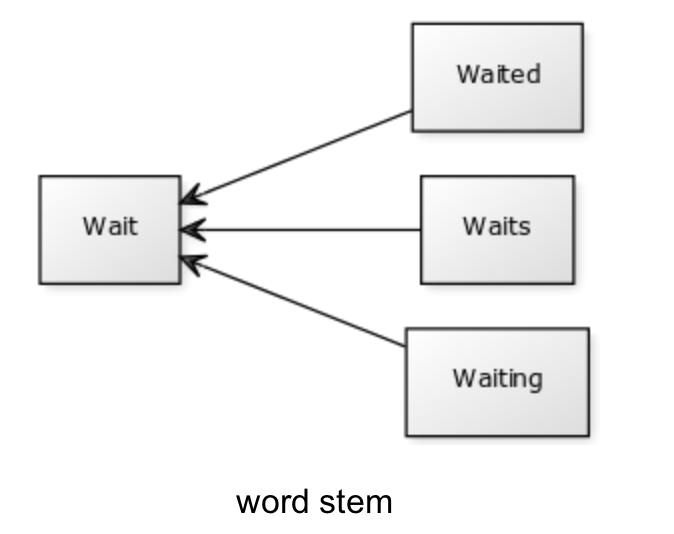

In [4]:
from IPython.display import Image
Image(filename='wordstem.png')

In [107]:
from nltk.stem import PorterStemmer

for i in dir(PorterStemmer) :
    if not i.startswith("_") :
        print(i)

MARTIN_EXTENSIONS
NLTK_EXTENSIONS
ORIGINAL_ALGORITHM
stem
unicode_repr


In [16]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
st.stem("eating")

'eat'

In [110]:
from nltk.stem import LancasterStemmer

for i in dir(LancasterStemmer) :
    if not i.startswith("_") :
        print(i)

default_rule_tuple
parseRules
stem
unicode_repr


In [120]:
st.default_rule_tuple[:10]

('ai*2.',
 'a*1.',
 'bb1.',
 'city3s.',
 'ci2>',
 'cn1t>',
 'dd1.',
 'dei3y>',
 'deec2ss.',
 'dee1.')

In [121]:
st.parseRules

<bound method LancasterStemmer.parseRules of <LancasterStemmer>>

In [119]:
from nltk.stem import LancasterStemmer
st = LancasterStemmer()
st.stem("shopping")

'shop'

In [122]:
from nltk.stem import RegexpStemmer

for i in dir(RegexpStemmer) :
    if not i.startswith("_") :
        print(i)

stem
unicode_repr


In [123]:
from nltk.stem import RegexpStemmer
st = RegexpStemmer("ing")
st.stem("cooking")

'cook'

###  어근을 분리하는 기준에 대한 두 클래스의 차이 : PorterStemmer LancasterStemmer

In [129]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()

print(stemmer.stem('cooking'))

print(stemmer.stem('cookery'))

cook
cookery


In [130]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('cooking'))

print(stemmer.stem('cookery'))

cook
cookeri


## 문장 내의 단어에 대한 어근을 처리하기 


In [4]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government. Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""



In [6]:
import nltk

wt = nltk.tokenize.word_tokenize(raw)

print(wt)

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'lying', 'in', 'ponds', 'distributing', 'swords', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'masses', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


In [11]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

st = { x:stemmer.stem(x) for x in wt}

print(st)

{'DENNIS': 'denni', ':': ':', 'Listen': 'listen', ',': ',', 'strange': 'strang', 'women': 'women', 'lying': 'lie', 'in': 'in', 'ponds': 'pond', 'distributing': 'distribut', 'swords': 'sword', 'is': 'is', 'no': 'no', 'basis': 'basi', 'for': 'for', 'a': 'a', 'system': 'system', 'of': 'of', 'government': 'govern', '.': '.', 'Supreme': 'suprem', 'executive': 'execut', 'power': 'power', 'derives': 'deriv', 'from': 'from', 'mandate': 'mandat', 'the': 'the', 'masses': 'mass', 'not': 'not', 'some': 'some', 'farcical': 'farcic', 'aquatic': 'aquat', 'ceremony': 'ceremoni'}


In [12]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

st = { x:stemmer.stem(x) for x in wt}

print(st)


{'DENNIS': 'den', ':': ':', 'Listen': 'list', ',': ',', 'strange': 'strange', 'women': 'wom', 'lying': 'lying', 'in': 'in', 'ponds': 'pond', 'distributing': 'distribut', 'swords': 'sword', 'is': 'is', 'no': 'no', 'basis': 'bas', 'for': 'for', 'a': 'a', 'system': 'system', 'of': 'of', 'government': 'govern', '.': '.', 'Supreme': 'suprem', 'executive': 'execut', 'power': 'pow', 'derives': 'der', 'from': 'from', 'mandate': 'mand', 'the': 'the', 'masses': 'mass', 'not': 'not', 'some': 'som', 'farcical': 'farc', 'aquatic': 'aqu', 'ceremony': 'ceremony'}


# 원형에 대한 복원 하기 : lemmatizing

In [20]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
print(lm.lemmatize("cooking"))
print(lm.lemmatize("cooking", pos="v"))
print(lm.lemmatize("cookbooks"))


cooking
cook
cookbook


### 어근과 원형 복원에 대한 차이

In [134]:
print(WordNetLemmatizer().lemmatize("believes"))

print(LancasterStemmer().stem("believes"))

belief
believ


In [133]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('believes'))

print(WordNetLemmatizer().lemmatize('believes'))

believ
belief


## 여러 단어 및 문장에 대한 stemming 

In [5]:
words = ["game","gaming","gamed","games"]

In [6]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [8]:
ps = PorterStemmer()
 
for word in words:
    print(word," : ",ps.stem(word))

game  :  game
gaming  :  game
gamed  :  game
games  :  game


In [10]:
sentence = "gaming, the gamers play games"
words = word_tokenize(sentence)

print(words)

for word in words:
    print(word + ":" + ps.stem(word))

['gaming', ',', 'the', 'gamers', 'play', 'games']
gaming:game
,:,
the:the
gamers:gamer
play:play
games:game


## 어근을 추출한 것을 정규화 처리 



In [23]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()

wnl = WordNetLemmatizer()

st = { x:stemmer.stem(x) for x in wt}

print(st)
print({ v:wnl.lemmatize(v) for t,v in st.items()})


{'DENNIS': 'denni', ':': ':', 'Listen': 'listen', ',': ',', 'strange': 'strang', 'women': 'women', 'lying': 'lie', 'in': 'in', 'ponds': 'pond', 'distributing': 'distribut', 'swords': 'sword', 'is': 'is', 'no': 'no', 'basis': 'basi', 'for': 'for', 'a': 'a', 'system': 'system', 'of': 'of', 'government': 'govern', '.': '.', 'Supreme': 'suprem', 'executive': 'execut', 'power': 'power', 'derives': 'deriv', 'from': 'from', 'mandate': 'mandat', 'the': 'the', 'masses': 'mass', 'not': 'not', 'some': 'some', 'farcical': 'farcic', 'aquatic': 'aquat', 'ceremony': 'ceremoni'}
{'denni': 'denni', ':': ':', 'listen': 'listen', ',': ',', 'strang': 'strang', 'women': 'woman', 'lie': 'lie', 'in': 'in', 'pond': 'pond', 'distribut': 'distribut', 'sword': 'sword', 'is': 'is', 'no': 'no', 'basi': 'basi', 'for': 'for', 'a': 'a', 'system': 'system', 'of': 'of', 'govern': 'govern', '.': '.', 'suprem': 'suprem', 'execut': 'execut', 'power': 'power', 'deriv': 'deriv', 'from': 'from', 'mandat': 'mandat', 'the': 't

In [22]:
print({ t:wnl.lemmatize(t) for t in st.keys()})

{'DENNIS': 'DENNIS', ':': ':', 'Listen': 'Listen', ',': ',', 'strange': 'strange', 'women': 'woman', 'lying': 'lying', 'in': 'in', 'ponds': 'pond', 'distributing': 'distributing', 'swords': 'sword', 'is': 'is', 'no': 'no', 'basis': 'basis', 'for': 'for', 'a': 'a', 'system': 'system', 'of': 'of', 'government': 'government', '.': '.', 'Supreme': 'Supreme', 'executive': 'executive', 'power': 'power', 'derives': 'derives', 'from': 'from', 'mandate': 'mandate', 'the': 'the', 'masses': 'mass', 'not': 'not', 'some': 'some', 'farcical': 'farcical', 'aquatic': 'aquatic', 'ceremony': 'ceremony'}
